Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Load the training, validation and test datasets into a dataframes 


In [2]:
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_val = pd.read_parquet('../data/processed/X_val.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet')
y_val = pd.read_parquet('../data/processed/y_val.parquet')
X_test = pd.read_parquet('../data/processed/X_test_scaled.parquet')

In [3]:
print('player_id' in X_train.columns)
print('player_id' in X_test.columns)
print ('player_id' in X_val.columns)

False
True
False


Remove 'player_id' from the test set

In [4]:
X_test_clean = X_test

In [5]:
X_test = X_test.drop(columns=['player_id'])

Train Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

C:\Users\shiri\AppData\Local\pypoetry\Cache\virtualenvs\kaggle1-nbadraft-JhF6N79V-py3.11\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, random_state=42)

In [8]:
y_train_pred_prob = rf_model.predict_proba(X_train)[:, 1]

In [9]:
y_val_pred_prob = rf_model.predict_proba(X_val)[:, 1]

Calculate AUROC on the training set

Import AUROC

In [10]:
from sklearn.metrics import roc_auc_score,roc_curve

In [11]:
train_auc = roc_auc_score(y_train, y_train_pred_prob)
print(f"Random Forest Training AUROC: {train_auc}")

Random Forest Training AUROC: 0.9890282034920597


In [12]:
val_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"Random Forest Validation AUROC: {val_auc}")

Random Forest Validation AUROC: 0.9845850289801454


Plot AUROC Curve

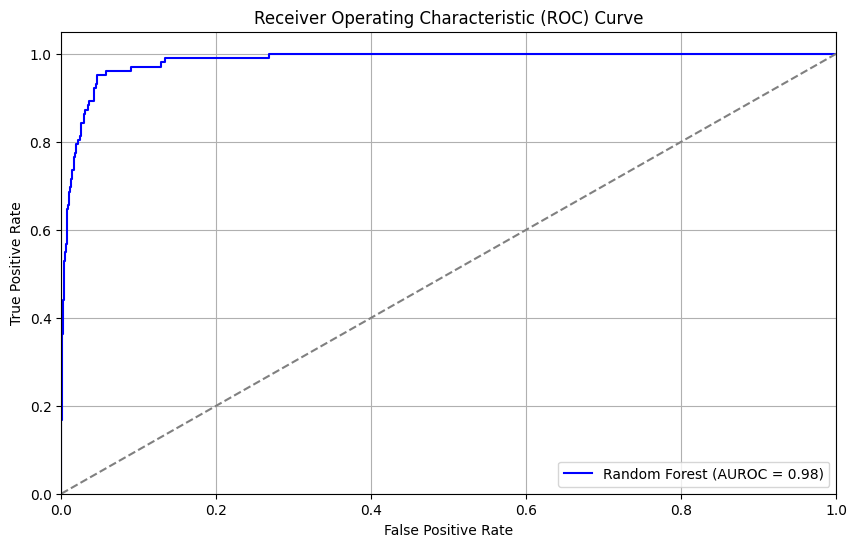

In [13]:
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Random Forest (AUROC = {:.2f})'.format(val_auc))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [14]:
test_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [15]:
test_pred_prob = rf_model.predict_proba(X_test)[:, 1]

Save the probability as CSV file

In [16]:
submission = pd.DataFrame({
    'player_id': X_test_clean['player_id'],
    'drafted': test_pred_prob
})

In [17]:
submission.to_csv('../data/external/sh-rf_Results.csv', index=False)

save the model

Import dump from joblib

In [18]:
from joblib import dump

In [19]:
dump(rf_model, '../models/sh-rf.joblib')

['../models/sh-rf.joblib']